# Import packages

In [2]:
# import core packages
import warnings
warnings.filterwarnings("ignore")
from itertools import combinations
import os
import copy 
# import semi-core packages
import matplotlib.pyplot as plt
from matplotlib import colors
%matplotlib inline
plt.style.use('seaborn-v0_8-poster')
import numpy as np
import pandas as pd
from multiprocessing import Pool

# import open2c libraries
import bioframe
import coolpuppy
from coolpuppy import coolpup, plotpup
import cooler
import cooltools
from cooltools import insulation
import cooltools.lib.plotting
from cooltools.lib import common, checks

from packaging import version
if version.parse(cooltools.__version__) < version.parse('0.5.2'):
    raise AssertionError("tutorial relies on cooltools version 0.5.2 or higher,"+
                         "please check your cooltools version and update to the latest")

# count cpus
num_cpus = os.getenv('SLURM_CPUS_PER_TASK')
if not num_cpus:
    num_cpus = os.cpu_count()
num_cpus = int(num_cpus)
print(num_cpus)

10


In [ ]:
import os
os.chdir("./MtoG1_analysis_code")
print(os.getcwd())
!pwd

/Volumes/UKJIN_SSD/MtoG1_analysis_code
/Volumes/UKJIN_SSD/MtoG1_analysis_code


In [3]:
figDir = '../figure/TAD'
os.makedirs(figDir, exist_ok=True)
coolDir = "../data/cool_norm_pooled"
outDir = "../data/TAD"
os.makedirs(outDir, exist_ok=True)

In [ ]:
clr = cooler.Cooler(os.path.join(coolDir, "G1DMSO_pooled_5000bp_KR.cool"))
tads = pd.read_csv(os.path.join(outDir, "TAD_25kb_125kb_otsu_G1DMSO_pooled.bed"), sep='\t', header=None)
tads.columns = ['chrom', 'start', 'end']
pileup_df_DMSO = coolpup.pileup(clr = clr,
                        features = tads,
                        features_format = 'bed',
                        clr_weight_name = 'weight',
                        min_diag = 2,
                        local = True,
                        rescale = True,
                        rescale_size = 99,
                        rescale_flank = 0.5,
                        nproc = 10, seed = 123)

clr = cooler.Cooler(os.path.join(coolDir, "G1dTAG_pooled_5000bp_KR.cool"))
tads = pd.read_csv(os.path.join(outDir, "TAD_25kb_125kb_otsu_G1DMSO_pooled.bed"), sep='\t', header=None)
tads.columns = ['chrom', 'start', 'end']
pileup_df_dTAG = coolpup.pileup(clr = clr,
                        features = tads,
                        features_format = 'bed',
                        clr_weight_name = 'weight',
                        min_diag = 2,
                        local = True,
                        rescale = True,
                        rescale_size = 99,
                        rescale_flank = 0.5,
                        nproc = 10, seed = 123)

clr = cooler.Cooler(os.path.join(coolDir, "G1A485_pooled_5000bp_KR.cool"))
tads = pd.read_csv(os.path.join(outDir, "TAD_25kb_125kb_otsu_G1DMSO_pooled.bed"), sep='\t', header=None)
tads.columns = ['chrom', 'start', 'end']
pileup_df_A485 = coolpup.pileup(clr = clr,
                        features = tads,
                        features_format = 'bed',
                        clr_weight_name = 'weight',
                        min_diag = 2,
                        local = True,
                        rescale = True,
                        rescale_size = 99,
                        rescale_flank = 0.5,
                        nproc = 10, seed = 123)

clr = cooler.Cooler(os.path.join(coolDir, "GSE178982_AsyncUT_pooled_5000bp_KR.cool"))
tads = pd.read_csv(os.path.join(outDir, "TAD_25kb_125kb_otsu_GSE178982_AsyncUT_pooled.bed"), sep='\t', header=None)
tads.columns = ['chrom', 'start', 'end']
pileup_df_UT = coolpup.pileup(clr = clr,
                        features = tads,
                        features_format = 'bed',
                        clr_weight_name = 'weight',
                        min_diag = 2,
                        local = True,
                        rescale = True,
                        rescale_size = 99,
                        rescale_flank = 0.5,
                        nproc = 10, seed = 123)

clr = cooler.Cooler(os.path.join(coolDir, "GSE178982_AsyncAID_pooled_5000bp_KR.cool"))
tads = pd.read_csv(os.path.join(outDir, "TAD_25kb_125kb_otsu_GSE178982_AsyncUT_pooled.bed"), sep='\t', header=None)
tads.columns = ['chrom', 'start', 'end']
pileup_df_AID = coolpup.pileup(clr = clr,
                        features = tads,
                        features_format = 'bed',
                        clr_weight_name = 'weight',
                        min_diag = 2,
                        local = True,
                        rescale = True,
                        rescale_size = 99,
                        rescale_flank = 0.5,
                        nproc = 10, seed = 123)


INFO:coolpuppy:Rescaling with rescale_flank = 0.5 to 99x99 pixels
INFO:coolpuppy:('chr10', 'chr10'): 193
INFO:coolpuppy:('chr9', 'chr9'): 185
INFO:coolpuppy:('chr6', 'chr6'): 211
INFO:coolpuppy:('chr8', 'chr8'): 160
INFO:coolpuppy:('chr5', 'chr5'): 191
INFO:coolpuppy:('chr7', 'chr7'): 194
INFO:coolpuppy:('chr3', 'chr3'): 209
INFO:coolpuppy:('chr15', 'chr15'): 147
INFO:coolpuppy:('chr16', 'chr16'): 137
INFO:coolpuppy:('chr4', 'chr4'): 204
INFO:coolpuppy:('chr13', 'chr13'): 167
INFO:coolpuppy:('chr14', 'chr14'): 139
INFO:coolpuppy:('chr17', 'chr17'): 121
INFO:coolpuppy:('chr19', 'chr19'): 93
INFO:coolpuppy:('chr12', 'chr12'): 138
INFO:coolpuppy:('chr11', 'chr11'): 172
INFO:coolpuppy:('chr18', 'chr18'): 134
INFO:coolpuppy:('chr2', 'chr2'): 263
INFO:coolpuppy:('chr1', 'chr1'): 259
INFO:coolpuppy:('chrX', 'chrX'): 174
INFO:coolpuppy:Total number of piled up windows: 3491


In [ ]:

clr = cooler.Cooler(os.path.join(coolDir, "EpiG1DMSO_pooled_5000bp_KR.cool"))
tads = pd.read_csv(os.path.join(outDir, "TAD_25kb_125kb_otsu_G1DMSO_pooled.bed"), sep='\t', header=None)
tads.columns = ['chrom', 'start', 'end']
pileup_df_EpiDMSO = coolpup.pileup(clr = clr,
                        features = tads,
                        features_format = 'bed',
                        clr_weight_name = 'weight',
                        min_diag = 2,
                        local = True,
                        rescale = True,
                        rescale_size = 99,
                        rescale_flank = 0.5,
                        nproc = 10, seed = 123)

clr = cooler.Cooler(os.path.join(coolDir, "EpiG1dTAG_pooled_5000bp_KR.cool"))
tads = pd.read_csv(os.path.join(outDir, "TAD_25kb_125kb_otsu_G1DMSO_pooled.bed"), sep='\t', header=None)
tads.columns = ['chrom', 'start', 'end']
pileup_df_EpidTAG = coolpup.pileup(clr = clr,
                        features = tads,
                        features_format = 'bed',
                        clr_weight_name = 'weight',
                        min_diag = 2,
                        local = True,
                        rescale = True,
                        rescale_size = 99,
                        rescale_flank = 0.5,
                        nproc = 10, seed = 123)

INFO:coolpuppy:Rescaling with rescale_flank = 0.5 to 99x99 pixels
INFO:coolpuppy:('chr9', 'chr9'): 185
INFO:coolpuppy:('chr10', 'chr10'): 193
INFO:coolpuppy:('chr4', 'chr4'): 204
INFO:coolpuppy:('chr6', 'chr6'): 211
INFO:coolpuppy:('chr8', 'chr8'): 160
INFO:coolpuppy:('chr5', 'chr5'): 191
INFO:coolpuppy:('chr7', 'chr7'): 194
INFO:coolpuppy:('chr3', 'chr3'): 209
INFO:coolpuppy:('chr2', 'chr2'): 263
INFO:coolpuppy:('chr1', 'chr1'): 259
INFO:coolpuppy:('chr12', 'chr12'): 138
INFO:coolpuppy:('chr19', 'chr19'): 93
INFO:coolpuppy:('chr18', 'chr18'): 134
INFO:coolpuppy:('chr16', 'chr16'): 137
INFO:coolpuppy:('chr13', 'chr13'): 167
INFO:coolpuppy:('chr11', 'chr11'): 172
INFO:coolpuppy:('chr17', 'chr17'): 121
INFO:coolpuppy:('chr15', 'chr15'): 147
INFO:coolpuppy:('chr14', 'chr14'): 139
INFO:coolpuppy:('chrX', 'chrX'): 174
INFO:coolpuppy:Total number of piled up windows: 3491


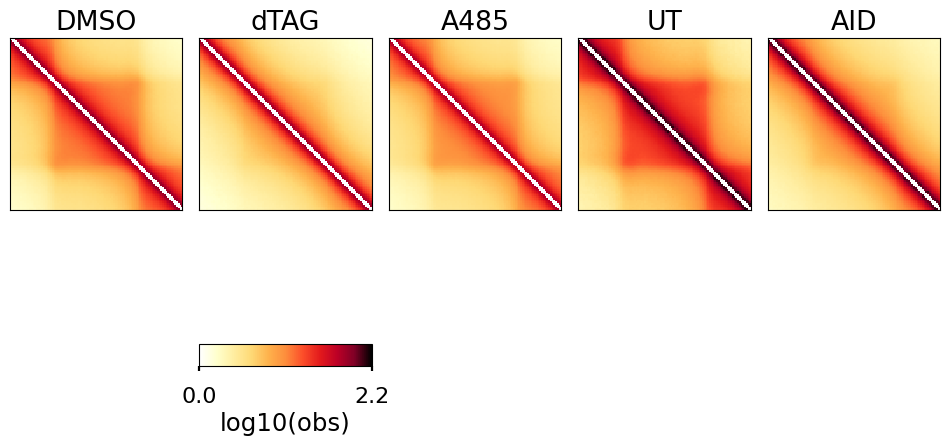

In [ ]:
from matplotlib import gridspec

mats = [
    np.log10(pileup_df_DMSO.data[0]*10000),
    np.log10(pileup_df_dTAG.data[0]*10000),
    np.log10(pileup_df_A485.data[0]*10000),
    np.log10(pileup_df_UT.data[0]*10000),
    np.log10(pileup_df_AID.data[0]*10000),

]
labels = ["DMSO", "dTAG", "A485", "UT", "AID"]

# create figure and a 2×2 GridSpec
fig = plt.figure(figsize=(12, 6))
gs = gridspec.GridSpec(
    nrows=2,
    ncols=5,
    height_ratios=[1, 0.05],   # top row 1x, bottom row 0.15x
    width_ratios=[1, 1, 1, 1, 1],       # two equal columns
    hspace=0,
    wspace=0.1
)

# top-left and top-right axes for heatmaps
ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])
ax2 = fig.add_subplot(gs[0, 2])
ax3 = fig.add_subplot(gs[0, 3])
ax4 = fig.add_subplot(gs[0, 4])

vmin = 0
vmax = 2.2

for ax, mat, title in zip((ax0, ax1, ax2, ax3, ax4), mats, labels):
    im = ax.imshow(
        mat,
        origin="lower",
        interpolation="nearest",
        cmap="fall",
        vmin=vmin,
        vmax=vmax
    )
    ax.set_title(title)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.invert_xaxis()  

# bottom-right axis for the colorbar
cax = fig.add_subplot(gs[1, 1])
cb = fig.colorbar(im, cax=cax, orientation="horizontal")
cb.set_ticks([vmin, vmax])      # only left & right tick
cb.set_label("log10(obs)")


plt.savefig(os.path.join(figDir, f'ADA.svg'), format = 'svg')

plt.show()


In [4]:
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec

def plot_pileup_comparison(
    pileup1, pileup2,
    name1, name2,
    out_path=None,
    log_mult=10000,
    vmin_obs=0, vmax_obs=2.2,
    lim_fc=0.5,
    cmap_obs="fall",
    cmap_fc="RdBu_r",
    figsize=(12,6)
):
    """
    pileup1, pileup2   : coolpup DataFrames or any object where pileup.data[0] is your matrix
    name1, name2       : titles for the two conditions
    out_path           : if given, saves SVG to this path
    log_mult           : multiplier before log10
    vmin_obs, vmax_obs : color limits for the first two panels
    lim_fc             : abs limit for fold change panel
    """
    # extract and transform
    d1 = np.log10(pileup1.data[0] * log_mult)
    d2 = np.log10(pileup2.data[0] * log_mult)
    fc = d2 - d1

    # set up grid
    fig = plt.figure(figsize=figsize)
    gs = gridspec.GridSpec(
        nrows=2, ncols=3,
        height_ratios=[1, 0.05],
        width_ratios =[1, 1, 1],
        hspace=0.05, wspace=0.1
    )

    # top row axes
    axs = [fig.add_subplot(gs[0, i]) for i in range(3)]

    # panel 0
    m0 = axs[0].imshow(
        d1, origin="lower", interpolation="nearest",
        cmap=cmap_obs, vmin=vmin_obs, vmax=vmax_obs
    )
    axs[0].set_title(name1)
    axs[0].invert_xaxis()
    axs[0].set_xticks([]); axs[0].set_yticks([])

    # panel 1
    m1 = axs[1].imshow(
        d2, origin="lower", interpolation="nearest",
        cmap=cmap_obs, vmin=vmin_obs, vmax=vmax_obs
    )
    axs[1].set_title(name2)
    axs[1].invert_xaxis()
    axs[1].set_xticks([]); axs[1].set_yticks([])

    # panel 2 (fold change)
    m2 = axs[2].imshow(
        fc, origin="lower", interpolation="nearest",
        cmap=cmap_fc, vmin=-lim_fc, vmax=lim_fc
    )
    axs[2].set_title(f"FC")
    axs[2].invert_xaxis()
    axs[2].set_xticks([]); axs[2].set_yticks([])

    # colorbar for obs (under cols 0–1)
    cax1 = fig.add_subplot(gs[1, 0])
    cb1  = fig.colorbar(m1, cax=cax1, orientation="horizontal")
    cb1.set_label("log10(obs)")
    cb1.set_ticks([vmin_obs, vmax_obs])

    # colorbar for FC (under col 2)
    cax2 = fig.add_subplot(gs[1, 2])
    cb2  = fig.colorbar(m2, cax=cax2, orientation="horizontal")
    cb2.set_label("log10(obs FC)")
    cb2.set_ticks([-lim_fc, lim_fc])

    if out_path:
        fig.savefig(out_path, format="svg")
    return fig

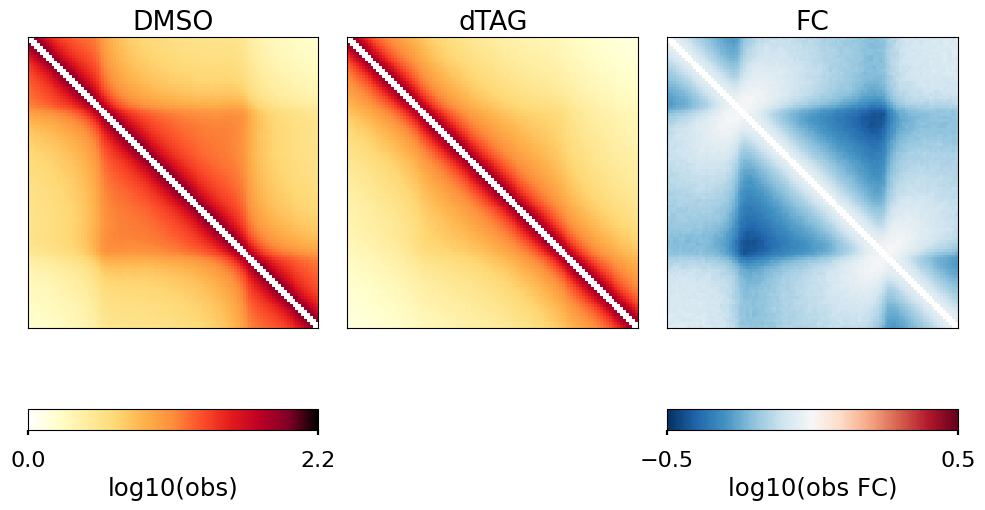

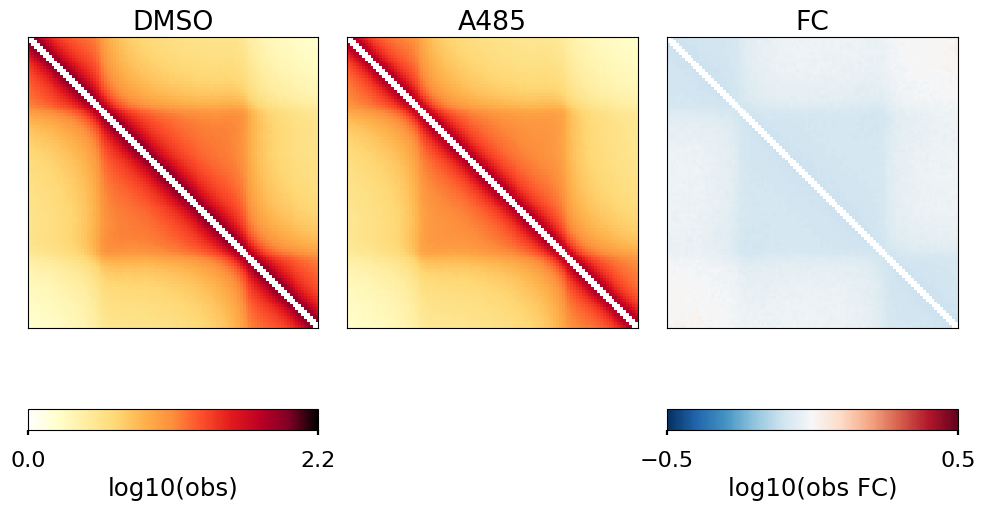

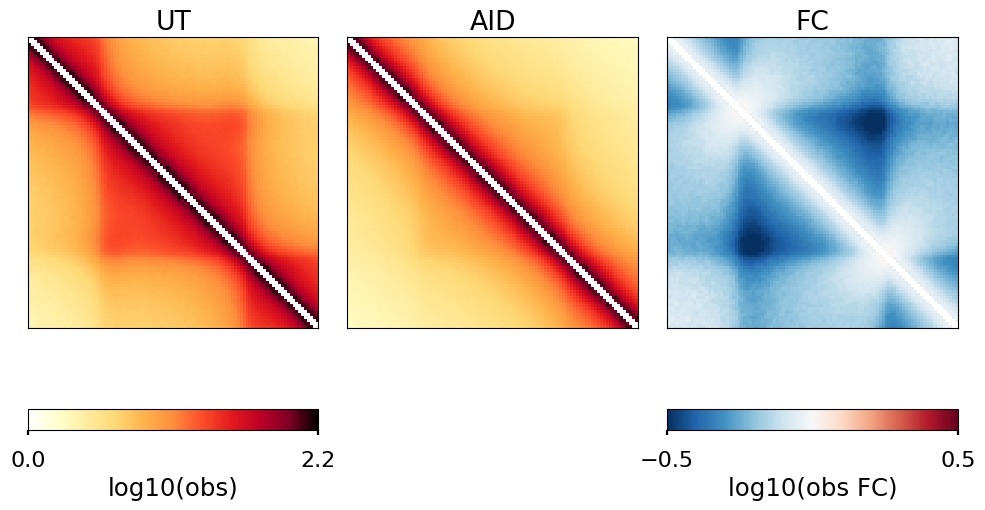

In [31]:
fig = plot_pileup_comparison(
    pileup_df_DMSO, pileup_df_dTAG,
    "DMSO", "dTAG",
    out_path=os.path.join(figDir, 'ADA_G1DMSO_G1dTAG.svg')
)
plt.show()

fig = plot_pileup_comparison(
    pileup_df_DMSO, pileup_df_A485,
    "DMSO", "A485",
    out_path=os.path.join(figDir, 'ADA_G1DMSO_G1A485.svg')
)
plt.show()

fig = plot_pileup_comparison(
    pileup_df_UT, pileup_df_AID,
    "UT", "AID",
    out_path=os.path.join(figDir, 'ADA_AsyncUT_AsyncAID.svg')
)
plt.show()




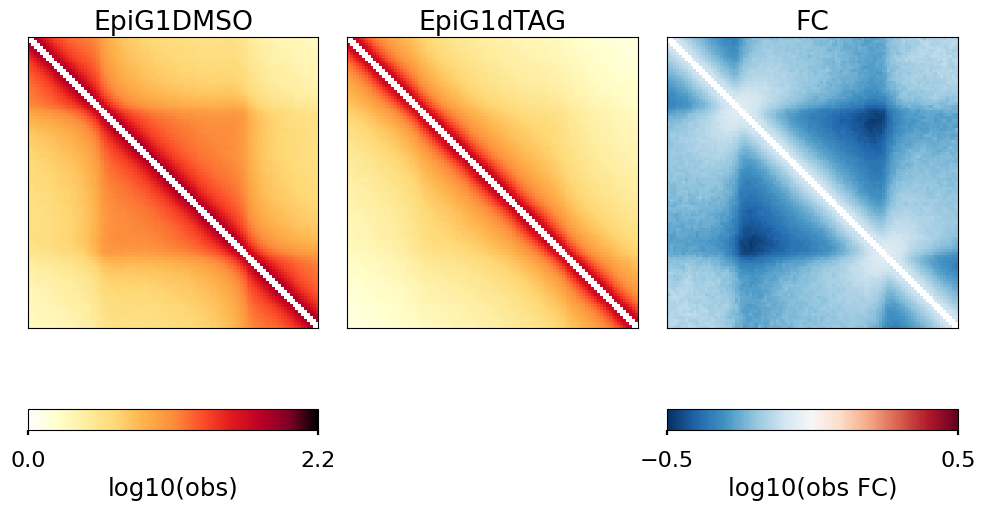

In [6]:
fig = plot_pileup_comparison(
    pileup_df_EpiDMSO, pileup_df_EpidTAG,
    "EpiG1DMSO", "EpiG1dTAG",
    out_path=os.path.join(figDir, 'ADA_EpiG1DMSO_EpiG1dTAG.svg')
)
plt.show()

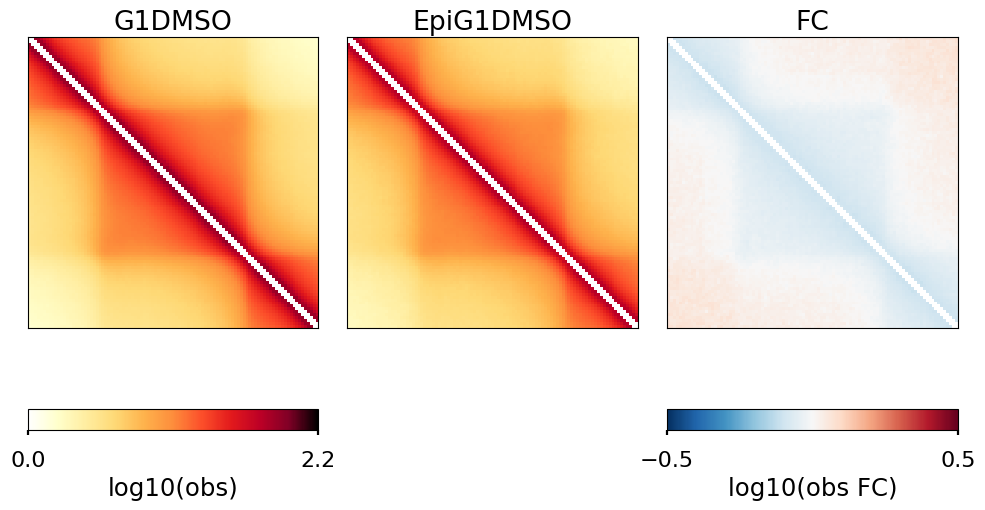

In [7]:
fig = plot_pileup_comparison(
    pileup_df_DMSO, pileup_df_EpiDMSO,
    "G1DMSO", "EpiG1DMSO",
    out_path=os.path.join(figDir, 'ADA_G1DMSO_EpiG1DMSO.svg')
)
plt.show()